In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
df1 = pd.read_csv("/Users/mohitsalur/Documents/AtoZ/Projects/customer_churn_ensemble_learning/customer_churn_dataset-training-master.csv")
df2 = pd.read_csv("/Users/mohitsalur/Documents/AtoZ/Projects/customer_churn_ensemble_learning/customer_churn_dataset-testing-master.csv")

# Combine both DataFrames
df = pd.concat([df1, df2], ignore_index=True)


#  basic info
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB
None


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [14]:
original=df.copy()

In [15]:
# Check for missing values
print(df.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [16]:
# Remove rows with NaN values
df = df.dropna()

# Verify if there are any NaN values left
# Check for missing values
print(df.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [17]:


# Identify non-numerical columns
non_numerical_cols = df.select_dtypes(exclude=['number']).columns

# Print distinct values for each non-numerical column
for col in non_numerical_cols:
    print(f"Distinct values in '{col}':")
    print(df[col].unique())
    print("-" * 50)

Distinct values in 'Gender':
['Female' 'Male']
--------------------------------------------------
Distinct values in 'Subscription Type':
['Standard' 'Basic' 'Premium']
--------------------------------------------------
Distinct values in 'Contract Length':
['Annual' 'Monthly' 'Quarterly']
--------------------------------------------------


In [18]:

from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Gender' (Binary: Female = 0, Male = 1)
gender_encoder = LabelEncoder()
df['Gender'] = gender_encoder.fit_transform(df['Gender'])

# Label Encoding for 'Subscription Type' (Ordinal: Basic < Standard < Premium)
sub_type_encoder = LabelEncoder()
df['Subscription Type'] = sub_type_encoder.fit_transform(df['Subscription Type'])

# One-Hot Encoding for 'Contract Length' (Non-Ordinal: Annual, Monthly, Quarterly)
df = pd.get_dummies(df, columns=['Contract Length'], drop_first=True)

# Display first few rows of transformed dataset
print(df.head())

# Check column names to verify encoding
print(df.columns)

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0       0    39.0             14.0            5.0   
1         3.0  65.0       0    49.0              1.0           10.0   
2         4.0  55.0       0    14.0              4.0            6.0   
3         5.0  58.0       1    38.0             21.0            7.0   
4         6.0  23.0       1    32.0             20.0            5.0   

   Payment Delay  Subscription Type  Total Spend  Last Interaction  Churn  \
0           18.0                  2        932.0              17.0    1.0   
1            8.0                  0        557.0               6.0    1.0   
2           18.0                  0        185.0               3.0    1.0   
3            7.0                  2        396.0              29.0    1.0   
4            8.0                  0        617.0              20.0    1.0   

   Contract Length_Monthly  Contract Length_Quarterly  
0                    False                      False 

In [19]:
# basic statistical details of numeric columns
df.describe()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,0.554770,31.350435,15.714825,3.833317,13.496843,1.012179,620.072766,14.610581,0.555203
std,137241.343095,12.670577,0.496992,17.237482,8.619323,3.133603,8.451187,0.814347,245.319256,8.608286,0.496944
min,1.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,0.000000,16.000000,8.000000,1.000000,6.000000,0.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,1.000000,32.000000,16.000000,3.000000,13.000000,1.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,1.000000,46.000000,23.000000,6.000000,20.000000,2.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,1.000000,60.000000,30.000000,10.000000,30.000000,2.000000,1000.000000,30.000000,1.000000


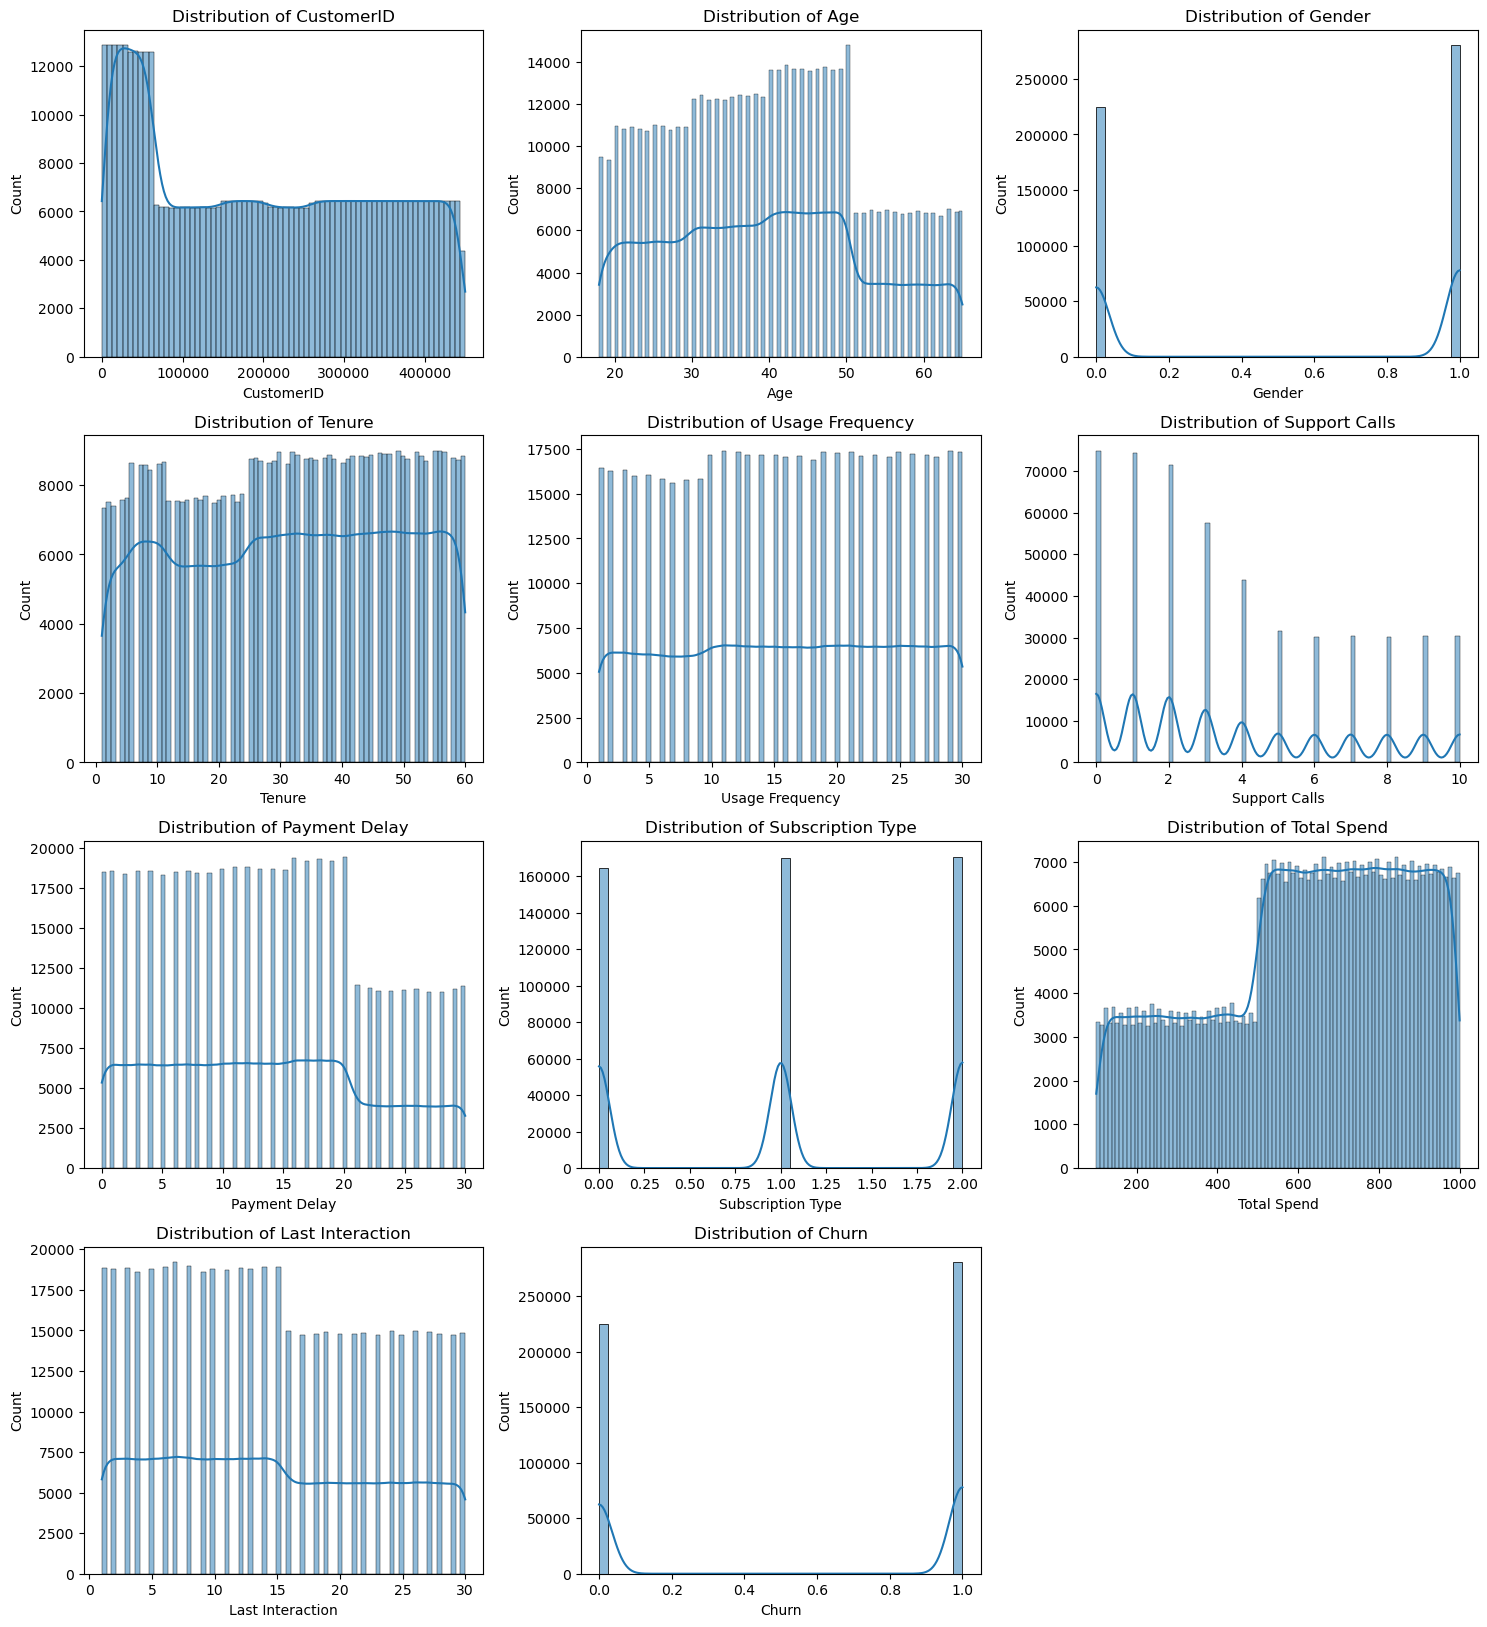

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size for all subplots
plt.figure(figsize=(15, 20))

# Plot histograms for all numeric columns
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(5, 3, i)  # Adjust the number of rows and columns as per the number of features
    sns.histplot(df[column], kde=True)  # Histogram with KDE (Kernel Density Estimation)
    plt.title(f"Distribution of {column}")

# Display all the plots
plt.tight_layout()
plt.show()

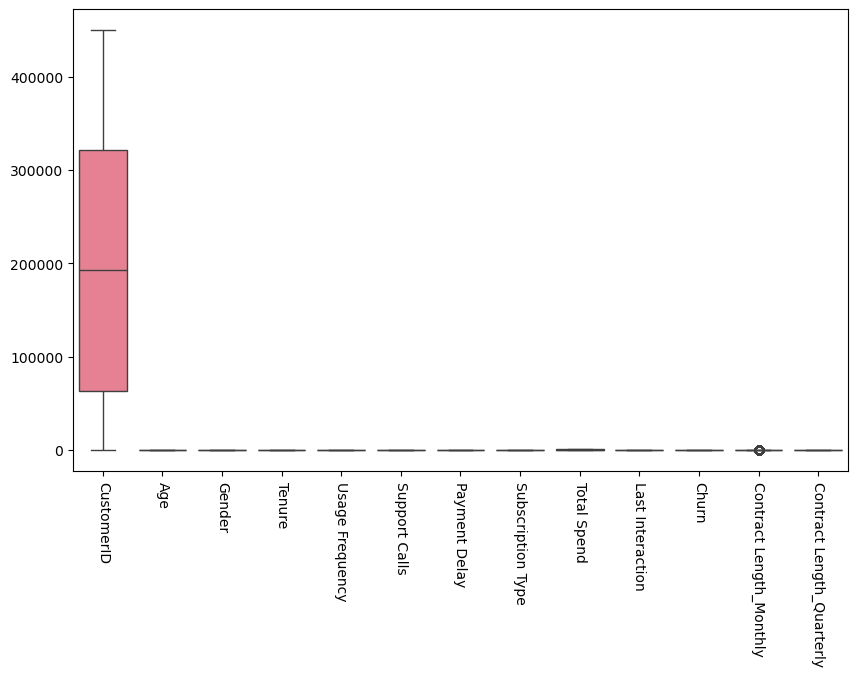

In [25]:
# Boxplot to check for outliers in numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=270)
plt.show()

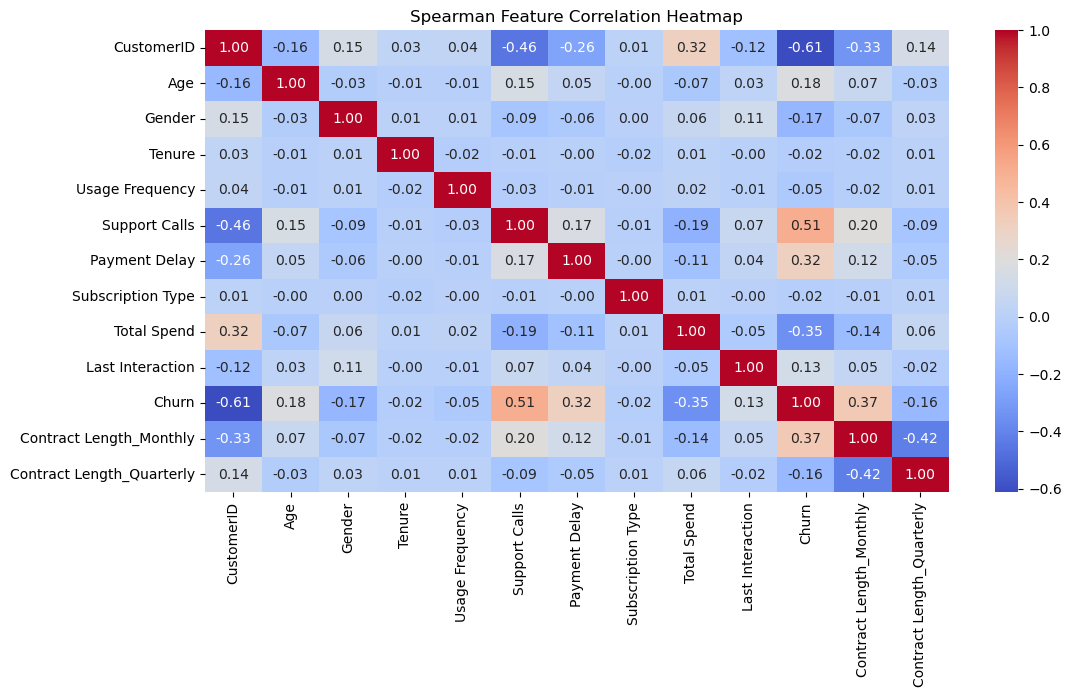

In [26]:
# Compute Spearman correlation matrix
correlation_matrix_spearman = df.corr(method='spearman')

# Display Spearman correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Feature Correlation Heatmap")
plt.show()

/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_17993/2213781844.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Support Calls', data=df, palette='coolwarm')
/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_17993/2213781844.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Age', data=df, palette='coolwarm')
/var/folders/yw/7nv526h96y59_0vhdnlch9k80000gn/T/ipykernel_17993/2213781844.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure', data=df, palette='coolwarm')
/

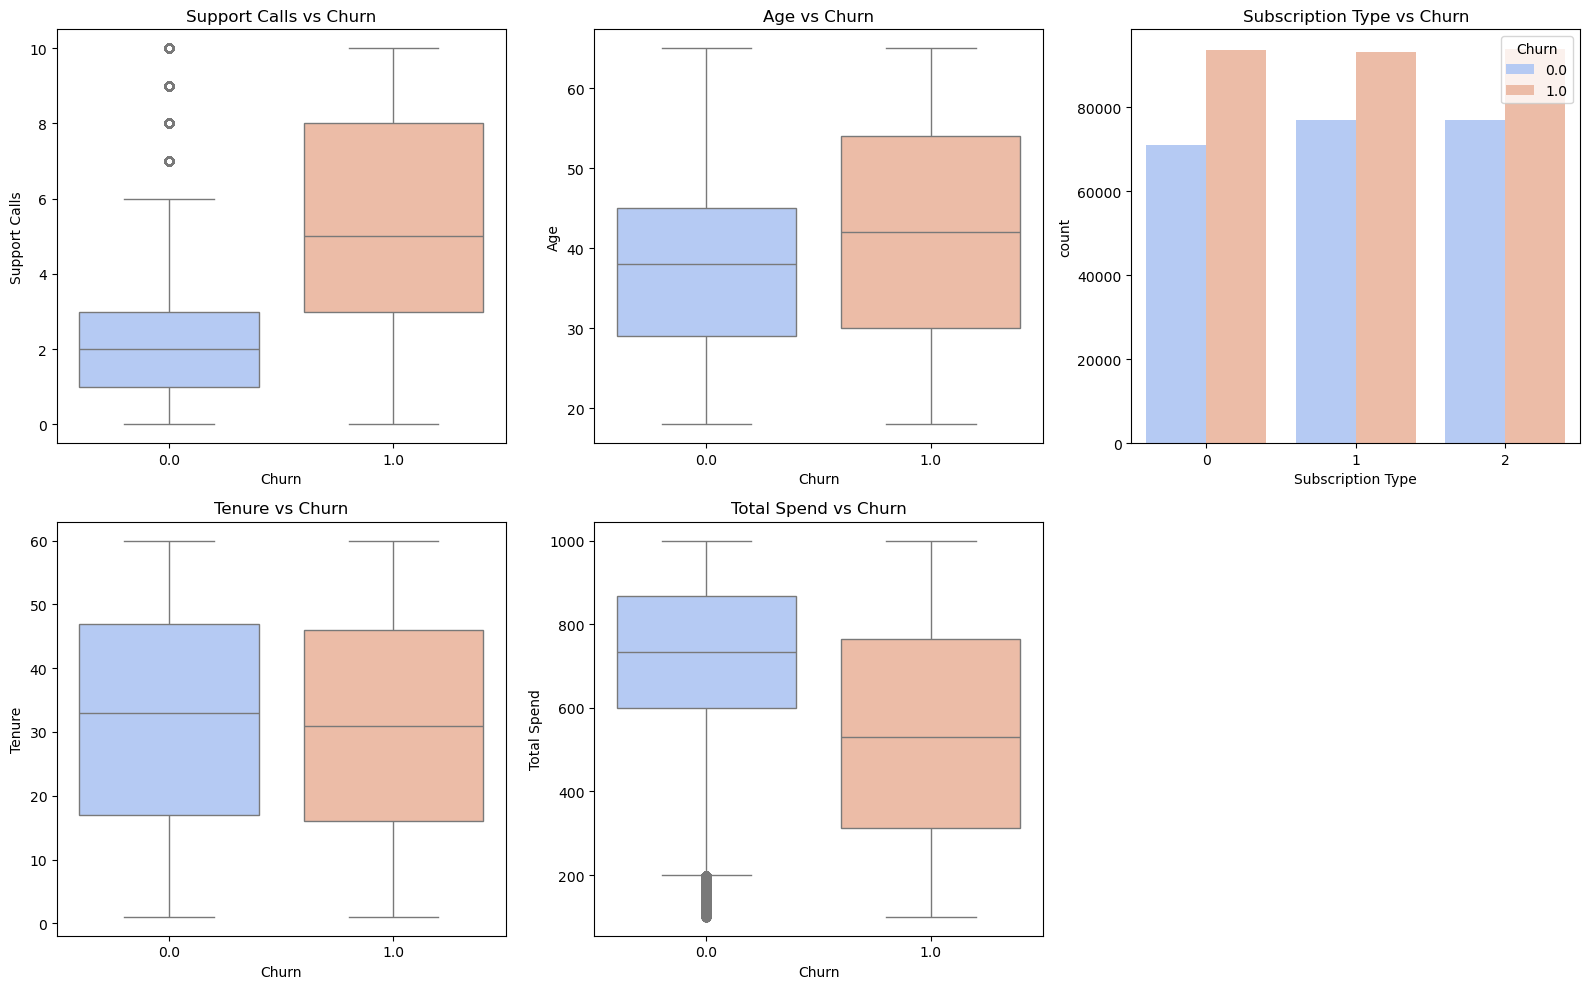

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(16, 10))

# 1. Support Calls vs Churn
plt.subplot(2, 3, 1)
sns.boxplot(x='Churn', y='Support Calls', data=df, palette='coolwarm')
plt.title('Support Calls vs Churn')

# 2. Age vs Churn
plt.subplot(2, 3, 2)
sns.boxplot(x='Churn', y='Age', data=df, palette='coolwarm')
plt.title('Age vs Churn')

# 3. Subscription Type vs Churn
plt.subplot(2, 3, 3)
sns.countplot(x='Subscription Type', hue='Churn', data=df, palette='coolwarm')
plt.title('Subscription Type vs Churn')

# 4. Tenure vs Churn
plt.subplot(2, 3, 4)
sns.boxplot(x='Churn', y='Tenure', data=df, palette='coolwarm')
plt.title('Tenure vs Churn')

# 5. Total Spend vs Churn
plt.subplot(2, 3, 5)
sns.boxplot(x='Churn', y='Total Spend', data=df, palette='coolwarm')
plt.title('Total Spend vs Churn')

# Display all the plots
plt.tight_layout()
plt.show()

In [31]:
# Drop 'CustomerID' as its an irrelevant columns
df = df.drop(columns=['CustomerID'])  

In [33]:
# Separate the target and features
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target

In [34]:
# Standardizing the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Check the distribution of target classes
y.value_counts()

Churn
1.0    280492
0.0    224714
Name: count, dtype: int64

Random Forest Model Accuracy: 0.9347301122305576

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.85      0.92     44981
         1.0       0.90      1.00      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



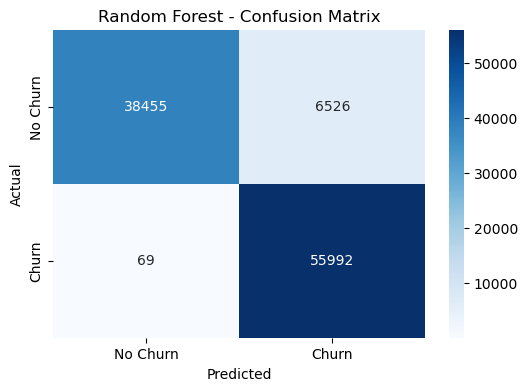

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the standardized data
rf_model.fit(X_train, y_train)  # Use rf_model here

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)  # Use rf_model here

# Evaluate the model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  31.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  31.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  32.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  31.9s
[CV] END max_depth=10, min_sa

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  43.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.4min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  42.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  41.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  43.2s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total tim

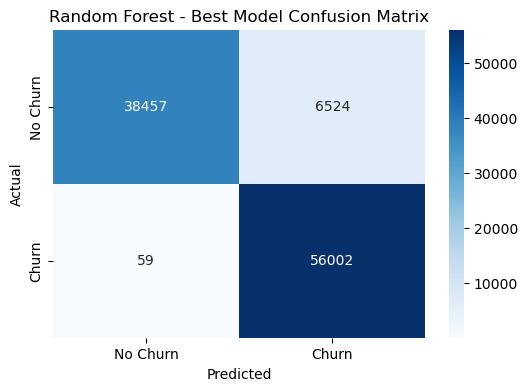

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameters for Random Forest
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [10, 20, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],   # Minimum samples required at a leaf node
}

# Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)  # Assuming you're using the original X_train and y_train here

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model_rf = grid_search.best_estimator_
y_pred_best = best_model_rf.predict(X_test)

# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Confusion Matrix
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Random Forest - Best Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gradient Boosting Accuracy: 0.9193008847805862

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.86      0.90     44981
         1.0       0.90      0.97      0.93     56061

    accuracy                           0.92    101042
   macro avg       0.93      0.91      0.92    101042
weighted avg       0.92      0.92      0.92    101042



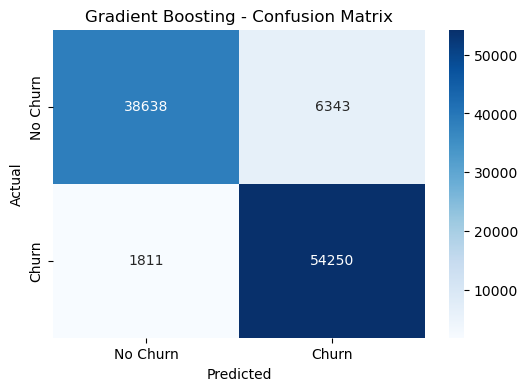

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the standardized data

gb_model.fit(X_train, y_train)  
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Gradient Boosting - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  43.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  43.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  43.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  43.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  43.8s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  44.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=20

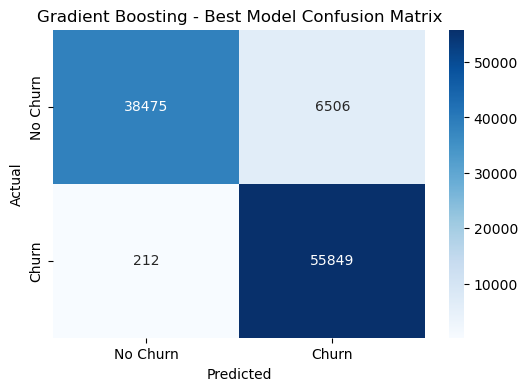

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid_gb = {
    'n_estimators': [100, 200],          # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size to prevent overfitting
    'max_depth': [3, 5, 7],               # Maximum depth of the individual trees
    'min_samples_split': [2, 5],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],           # Minimum number of samples required to be at a leaf node
}

# Perform Grid Search with cross-validation using parallel computation
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)

# Fit the model (parallelized)
grid_search_gb.fit(X_train, y_train)  # Use X_train_smote, y_train_smote if using SMOTE

# Get the best hyperparameters
print("Best Gradient Boosting Hyperparameters:", grid_search_gb.best_params_)

# Best Gradient Boosting model
best_gb_model = grid_search_gb.best_estimator_

# Evaluate the best model
y_pred_gb = best_gb_model.predict(X_test)

# Accuracy and Classification Report
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Gradient Boosting - Best Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBoost Accuracy: 0.932523109202114

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     44981
         1.0       0.90      0.99      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.94      0.92      0.93    101042
weighted avg       0.94      0.93      0.93    101042



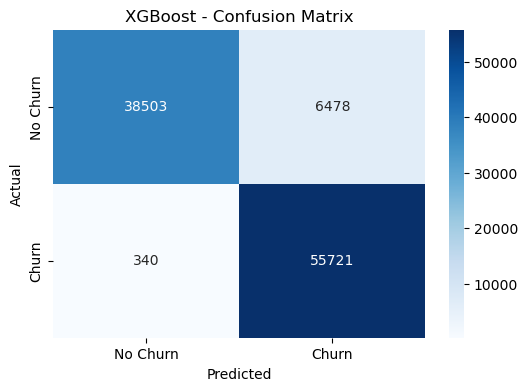

In [44]:
import xgboost as xgb


# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.5s
[CV] END c

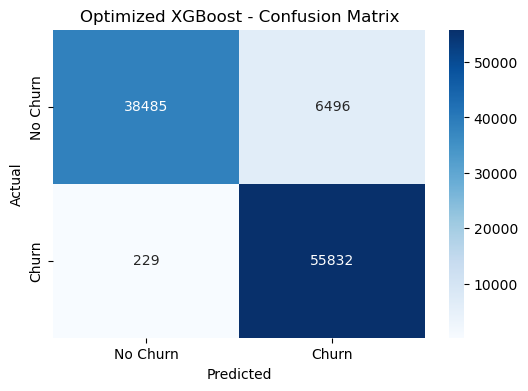

In [47]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize XGBoost model (without deprecated parameters)
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

# Define hyperparameters for tuning
param_grid_xgb = {
    'n_estimators': [100, 200],      # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 7],          # Tree depth
    'subsample': [0.8, 1.0],         # Fraction of samples per tree
    'colsample_bytree': [0.8, 1.0]   # Fraction of features per tree
}

# Perform Grid Search with parallel computation (n_jobs=-1 uses all CPU cores)
grid_search_xgb = GridSearchCV(estimator=xgb_model, 
                               param_grid=param_grid_xgb, 
                               cv=5, 
                               n_jobs=-1, 
                               verbose=2)

# Train the model with Grid Search on original dataset
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
print("Best XGBoost Hyperparameters:", grid_search_xgb.best_params_)

# Best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions using the best model
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the optimized model
print("Optimized XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_best_xgb))

# Confusion Matrix
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Optimized XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

🔹 Accuracy of Stacking Classifier: 0.932572593574949

🔹 Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     44981
         1.0       0.90      0.99      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.94      0.92      0.93    101042
weighted avg       0.94      0.93      0.93    101042



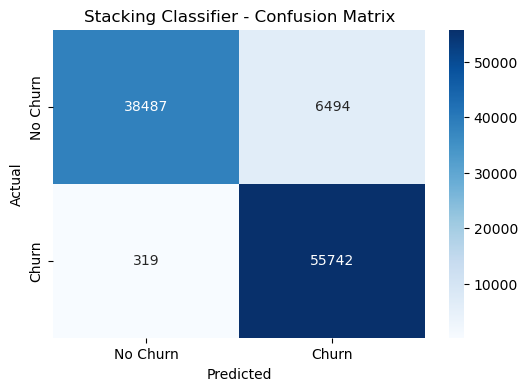

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define base models
base_models = [
    ('rf', best_model_rf),  # Random Forest
    ('gb', best_gb_model),  # Gradient Boosting
    ('xgb', best_xgb_model)  # XGBoost
]

# Define meta-model (Logistic Regression)
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Create Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate performance
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("🔹 Accuracy of Stacking Classifier:", accuracy_stacking)

# Classification Report (Precision, Recall, F1-Score)
print("\n🔹 Classification Report for Stacking Classifier:")
print(classification_report(y_test, y_pred_stacking))

# Confusion Matrix
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Stacking Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy of Voting Classifier (Random Forest, Gradient Boosting, XGBoost): 0.9339878466380317

Classification Report for Voting Classifier:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92     44981
         1.0       0.90      1.00      0.94     56061

    accuracy                           0.93    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



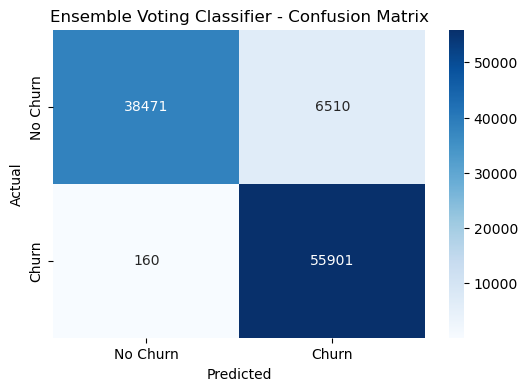

In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Voting Classifier using the best models from Random Forest, Gradient Boosting, and XGBoost
voting_clf = VotingClassifier(estimators=[
    ('rf', best_model_rf),  # Random Forest
    ('gb', best_gb_model),  # Gradient Boosting
    ('xgb', best_xgb_model)  # XGBoost
], voting='hard')  # Use 'hard' voting (majority class voting)

# Train the ensemble model on the original training dataset
voting_clf.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the ensemble model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy of Voting Classifier (Random Forest, Gradient Boosting, XGBoost):", accuracy_voting)

# Print classification report
print("\nClassification Report for Voting Classifier:")
print(classification_report(y_test, y_pred_voting))

# Confusion Matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Ensemble Voting Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()